<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Challenges-Kaggle/blob/main/COVID-19%20mRNA%20Vaccine%20Degradation/mRNA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re

train = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/COVID-19%20mRNA%20Vaccine%20Degradation/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/COVID-19%20mRNA%20Vaccine%20Degradation/test.csv')
sample_submission = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/COVID-19%20mRNA%20Vaccine%20Degradation/sample_submission.csv')



In [2]:
# merge train and test data into df
df = pd.concat([train, test])
df.head()

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,...,b4_structure,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type
0,id_159f0ff46,id_159f0ff46_44,A,.,H,1.7786,0.1195,0.7346,0.0790,0.3680,...,(,),S,S,C,A,.,),I,S
1,id_d73546f4e,id_d73546f4e_38,G,.,I,0.4397,0.1033,0.1630,0.0799,0.0878,...,(,.,S,H,C,C,.,.,B,H
2,id_f3037fedf,id_f3037fedf_34,G,(,S,0.1120,0.1375,0.0000,0.0744,0.1835,...,(,(,S,S,A,G,(,(,S,S
3,id_468300749,id_468300749_12,G,(,S,0.0622,0.0471,0.1179,0.1075,0.0657,...,.,(,E,S,A,U,.,(,E,S
4,id_69e3878a2,id_69e3878a2_28,U,(,S,0.1378,0.1352,0.4069,0.2168,0.3375,...,(,(,S,S,G,G,(,.,S,H


<Axes: >

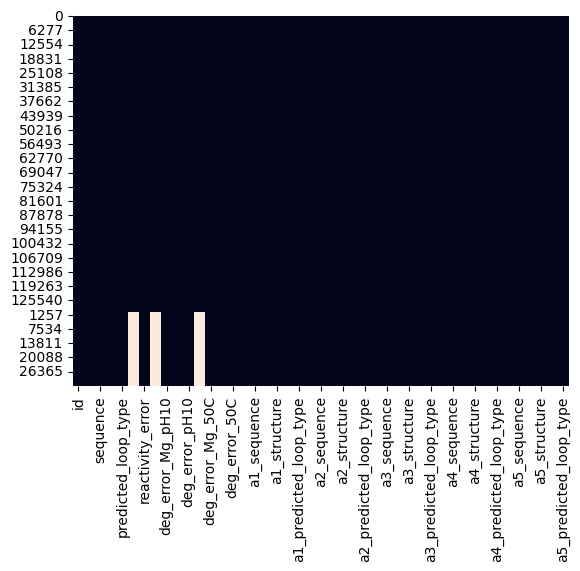

In [3]:
sns.heatmap(df.isnull(), cbar=False)

In [4]:
df['id_number'] = df['id_seqpos'].apply(lambda x: re.search(r'_(\d+)$', x).group(1)).apply(lambda x: int(x))
df['seqRow'] = df['b5_sequence'] + df['b4_sequence'] + df['b3_sequence'] + df['b2_sequence'] + df['b1_sequence'] + df['sequence'] + df['a1_sequence'] + df['a2_sequence'] + df['a3_sequence'] + df['a4_sequence'] + df['a5_sequence']
df['structureRow'] = df['b5_structure'] + df['b4_structure'] + df['b3_structure'] + df['b2_structure'] + df['b1_structure'] + df['structure'] + df['a1_structure'] + df['a2_structure'] + df['a3_structure'] + df['a4_structure'] + df['a5_structure']
df.head(2)


,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,...,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type,id_number,seqRow,structureRow
0,id_159f0ff46,id_159f0ff46_44,A,.,H,1.7786,0.1195,0.7346,0.0790,0.3680,...,S,C,A,.,),I,S,44,CGUGCAUCGCA,.((((...)))
1,id_d73546f4e,id_d73546f4e_38,G,.,I,0.4397,0.1033,0.1630,0.0799,0.0878,...,H,C,C,.,.,B,H,38,CGACGGACGUC,.((((..((..


### sequence

In [5]:
full_sequence = {}
for id in df['id'].unique():
    sample = df[df['id']==id].sort_values('id_number')
    q={}
    for index, row in sample.iterrows():
        q[row['id_number']] = row['sequence']

    for i in range(0, 72):
        try:
            if i in q.keys():
                pass
            else:
                if i+1 in q.keys() and i < 68:
                    q[i] = sample[sample['id_number']==i+1]['b1_sequence'].values[0]
                else:
                    if i+2 in q.keys() and i + 2 < 68:
                        q[i] = q[i] = sample[sample['id_number']==i+2]['b2_sequence'].values[0]
                        q[i+1] = sample[sample['id_number']==i+2]['b1_sequence'].values[0]
                    else:
                        if i+3 in q.keys() and i + 3 < 68:

                            q[i] = sample[sample['id_number']==i+3]['b3_sequence'].values[0]
                            q[i+1] = sample[sample['id_number']==i+3]['b2_sequence'].values[0]
                            q[i+2] = sample[sample['id_number']==i+3]['b1_sequence'].values[0]
                        else:
                            if i+4 in q.keys() and i + 4 < 68:

                                q[i] = sample[sample['id_number']==i+4]['b4_sequence'].values[0]
                                q[i+1] = sample[sample['id_number']==i+4]['b3_sequence'].values[0]
                                q[i+2] = sample[sample['id_number']==i+4]['b2_sequence'].values[0]
                                q[i+3] = sample[sample['id_number']==i+4]['b1_sequence'].values[0]
                            else:
                                if i+5 in q.keys() and i + 5 < 68:

                                    q[i] = sample[sample['id_number']==i+5]['b5_sequence'].values[0]
                                    q[i+1] = sample[sample['id_number']==i+5]['b4_sequence'].values[0]
                                    q[i+2] = sample[sample['id_number']==i+5]['b3_sequence'].values[0]
                                    q[i+3] = sample[sample['id_number']==i+5]['b2_sequence'].values[0]
                                    q[i+4] = sample[sample['id_number']==i+5]['b1_sequence'].values[0]
                                else:
                                    pass
        except:
            pass


    if 63 not in q.keys():
        if not sample[sample['id_number']==62].empty:
            q[63] = sample[sample['id_number']==62]['a1_sequence'].values[0]
        elif not sample[sample['id_number']==61].empty:
            q[63] = sample[sample['id_number']==61]['a2_sequence'].values[0]
        elif not sample[sample['id_number']==60].empty:
            q[63] = sample[sample['id_number']==60]['a3_sequence'].values[0]
        elif not sample[sample['id_number']==59].empty:
            q[63] = sample[sample['id_number']==59]['a4_sequence'].values[0]
        else:
            q[63] = sample[sample['id_number']==58]['a5_sequence'].values[0]

    if 64 not in q.keys():
        if not sample[sample['id_number']==63].empty:
            q[64] = sample[sample['id_number']==63]['a1_sequence'].values[0]
        elif not sample[sample['id_number']==62].empty:
            q[64] = sample[sample['id_number']==62]['a2_sequence'].values[0]
        elif not sample[sample['id_number']==61].empty:
            q[64] = sample[sample['id_number']==61]['a3_sequence'].values[0]
        elif not sample[sample['id_number']==60].empty:
            q[64] = sample[sample['id_number']==60]['a4_sequence'].values[0]
        else:
            q[64] = sample[sample['id_number']==59]['a5_sequence'].values[0]

    if 65 not in q.keys():
        if not sample[sample['id_number']==64].empty:
            q[65] = sample[sample['id_number']==64]['a1_sequence'].values[0]
        elif not sample[sample['id_number']==63].empty:
            q[65] = sample[sample['id_number']==63]['a2_sequence'].values[0]
        elif not sample[sample['id_number']==62].empty:
            q[65] = sample[sample['id_number']==62]['a3_sequence'].values[0]
        elif not sample[sample['id_number']==61].empty:
            q[65] = sample[sample['id_number']==61]['a4_sequence'].values[0]
        else:
            q[65] = sample[sample['id_number']==60]['a5_sequence'].values[0]

    if 66 not in q.keys():
        if not sample[sample['id_number']==64].empty:
            q[66] = sample[sample['id_number']==64]['a1_sequence'].values[0]
        elif not sample[sample['id_number']==63].empty:
            q[66] = sample[sample['id_number']==63]['a2_sequence'].values[0]
        elif not sample[sample['id_number']==62].empty:
            q[66] = sample[sample['id_number']==62]['a3_sequence'].values[0]
        elif not sample[sample['id_number']==61].empty:
            q[66] = sample[sample['id_number']==61]['a4_sequence'].values[0]
        else:
            q[66] = sample[sample['id_number']==60]['a5_sequence'].values[0]

    if 67 not in q.keys():
        if not sample[sample['id_number']==66].empty:
            q[67] = sample[sample['id_number']==66]['a1_sequence'].values[0]
        elif not sample[sample['id_number']==65].empty:
            q[67] = sample[sample['id_number']==65]['a2_sequence'].values[0]
        elif not sample[sample['id_number']==64].empty:
            q[67] = sample[sample['id_number']==64]['a3_sequence'].values[0]
        elif not sample[sample['id_number']==63].empty:
            q[67] = sample[sample['id_number']==63]['a4_sequence'].values[0]
        else:
            q[67] = sample[sample['id_number']==62]['a5_sequence'].values[0]


    if not sample[sample['id_number']==67].empty:
        q[67] = q[67]+sample[sample['id_number']==67]['a1_sequence'].values[0]
    elif not sample[sample['id_number']==66].empty:
        q[67] = q[67]+sample[sample['id_number']==66]['a2_sequence'].values[0]
    elif not sample[sample['id_number']==65].empty:
        q[67] = q[67]+sample[sample['id_number']==65]['a3_sequence'].values[0]
    elif not sample[sample['id_number']==64].empty:
        q[67] = q[67]+sample[sample['id_number']==64]['a4_sequence'].values[0]
    else:
        q[67] = q[67]+sample[sample['id_number']==63]['a5_sequence'].values[0]


    sorted_sample = {k: q[k] for k in sorted(q)}
    concatenated_string = ''.join(sorted_sample.values())
    full_sequence[id] = concatenated_string

### Structure

In [6]:
full_structure = {}
for id in df['id'].unique():
    sample = df[df['id']==id].sort_values('id_number')
    q={}
    for index, row in sample.iterrows():
        q[row['id_number']] = row['structure']

    for i in range(0, 72):
        try:
            if i in q.keys():
                pass
            else:
                if i+1 in q.keys() and i < 68:
                    q[i] = sample[sample['id_number']==i+1]['b1_structure'].values[0]
                else:
                    if i+2 in q.keys() and i + 2 < 68:
                        q[i] = q[i] = sample[sample['id_number']==i+2]['b2_structure'].values[0]
                        q[i+1] = sample[sample['id_number']==i+2]['b1_structure'].values[0]
                    else:
                        if i+3 in q.keys() and i + 3 < 68:

                            q[i] = sample[sample['id_number']==i+3]['b3_structure'].values[0]
                            q[i+1] = sample[sample['id_number']==i+3]['b2_structure'].values[0]
                            q[i+2] = sample[sample['id_number']==i+3]['b1_structure'].values[0]
                        else:
                            if i+4 in q.keys() and i + 4 < 68:

                                q[i] = sample[sample['id_number']==i+4]['b4_structure'].values[0]
                                q[i+1] = sample[sample['id_number']==i+4]['b3_structure'].values[0]
                                q[i+2] = sample[sample['id_number']==i+4]['b2_structure'].values[0]
                                q[i+3] = sample[sample['id_number']==i+4]['b1_structure'].values[0]
                            else:
                                if i+5 in q.keys() and i + 5 < 68:

                                    q[i] = sample[sample['id_number']==i+5]['b5_structure'].values[0]
                                    q[i+1] = sample[sample['id_number']==i+5]['b4_structure'].values[0]
                                    q[i+2] = sample[sample['id_number']==i+5]['b3_structure'].values[0]
                                    q[i+3] = sample[sample['id_number']==i+5]['b2_structure'].values[0]
                                    q[i+4] = sample[sample['id_number']==i+5]['b1_structure'].values[0]
                                else:
                                    pass
        except:
            pass


    if 63 not in q.keys():
        if not sample[sample['id_number']==62].empty:
            q[63] = sample[sample['id_number']==62]['a1_structure'].values[0]
        elif not sample[sample['id_number']==61].empty:
            q[63] = sample[sample['id_number']==61]['a2_structure'].values[0]
        elif not sample[sample['id_number']==60].empty:
            q[63] = sample[sample['id_number']==60]['a3_structure'].values[0]
        elif not sample[sample['id_number']==59].empty:
            q[63] = sample[sample['id_number']==59]['a4_structure'].values[0]
        else:
            q[63] = sample[sample['id_number']==58]['a5_structure'].values[0]

    if 64 not in q.keys():
        if not sample[sample['id_number']==63].empty:
            q[64] = sample[sample['id_number']==63]['a1_structure'].values[0]
        elif not sample[sample['id_number']==62].empty:
            q[64] = sample[sample['id_number']==62]['a2_structure'].values[0]
        elif not sample[sample['id_number']==61].empty:
            q[64] = sample[sample['id_number']==61]['a3_structure'].values[0]
        elif not sample[sample['id_number']==60].empty:
            q[64] = sample[sample['id_number']==60]['a4_structure'].values[0]
        else:
            q[64] = sample[sample['id_number']==59]['a5_structure'].values[0]

    if 65 not in q.keys():
        if not sample[sample['id_number']==64].empty:
            q[65] = sample[sample['id_number']==64]['a1_structure'].values[0]
        elif not sample[sample['id_number']==63].empty:
            q[65] = sample[sample['id_number']==63]['a2_structure'].values[0]
        elif not sample[sample['id_number']==62].empty:
            q[65] = sample[sample['id_number']==62]['a3_structure'].values[0]
        elif not sample[sample['id_number']==61].empty:
            q[65] = sample[sample['id_number']==61]['a4_structure'].values[0]
        else:
            q[65] = sample[sample['id_number']==60]['a5_structure'].values[0]

    if 66 not in q.keys():
        if not sample[sample['id_number']==64].empty:
            q[66] = sample[sample['id_number']==64]['a1_structure'].values[0]
        elif not sample[sample['id_number']==63].empty:
            q[66] = sample[sample['id_number']==63]['a2_structure'].values[0]
        elif not sample[sample['id_number']==62].empty:
            q[66] = sample[sample['id_number']==62]['a3_structure'].values[0]
        elif not sample[sample['id_number']==61].empty:
            q[66] = sample[sample['id_number']==61]['a4_structure'].values[0]
        else:
            q[66] = sample[sample['id_number']==60]['a5_structure'].values[0]

    if 67 not in q.keys():
        if not sample[sample['id_number']==66].empty:
            q[67] = sample[sample['id_number']==66]['a1_structure'].values[0]
        elif not sample[sample['id_number']==65].empty:
            q[67] = sample[sample['id_number']==65]['a2_structure'].values[0]
        elif not sample[sample['id_number']==64].empty:
            q[67] = sample[sample['id_number']==64]['a3_structure'].values[0]
        elif not sample[sample['id_number']==63].empty:
            q[67] = sample[sample['id_number']==63]['a4_structure'].values[0]
        else:
            q[67] = sample[sample['id_number']==62]['a5_structure'].values[0]


    if not sample[sample['id_number']==67].empty:
        q[67] = q[67]+sample[sample['id_number']==67]['a1_structure'].values[0]
    elif not sample[sample['id_number']==66].empty:
        q[67] = q[67]+sample[sample['id_number']==66]['a2_structure'].values[0]
    elif not sample[sample['id_number']==65].empty:
        q[67] = q[67]+sample[sample['id_number']==65]['a3_structure'].values[0]
    elif not sample[sample['id_number']==64].empty:
        q[67] = q[67]+sample[sample['id_number']==64]['a4_structure'].values[0]
    else:
        q[67] = q[67]+sample[sample['id_number']==63]['a5_structure'].values[0]


    sorted_sample = {k: q[k] for k in sorted(q)}
    concatenated_string = ''.join(sorted_sample.values())
    full_structure[id] = concatenated_string

### predicted loop

In [7]:
predicted_loop = {}
for id in df['id'].unique():
    sample = df[df['id']==id].sort_values('id_number')
    q={}
    for index, row in sample.iterrows():
        q[row['id_number']] = row['predicted_loop_type']

    for i in range(0, 72):
        try:
            if i in q.keys():
                pass
            else:
                if i+1 in q.keys() and i < 68:
                    q[i] = sample[sample['id_number']==i+1]['b1_predicted_loop_type'].values[0]
                else:
                    if i+2 in q.keys() and i + 2 < 68:
                        q[i] = q[i] = sample[sample['id_number']==i+2]['b2_predicted_loop_type'].values[0]
                        q[i+1] = sample[sample['id_number']==i+2]['b1_predicted_loop_type'].values[0]
                    else:
                        if i+3 in q.keys() and i + 3 < 68:

                            q[i] = sample[sample['id_number']==i+3]['b3_predicted_loop_type'].values[0]
                            q[i+1] = sample[sample['id_number']==i+3]['b2_predicted_loop_type'].values[0]
                            q[i+2] = sample[sample['id_number']==i+3]['b1_predicted_loop_type'].values[0]
                        else:
                            if i+4 in q.keys() and i + 4 < 68:

                                q[i] = sample[sample['id_number']==i+4]['b4_predicted_loop_type'].values[0]
                                q[i+1] = sample[sample['id_number']==i+4]['b3_predicted_loop_type'].values[0]
                                q[i+2] = sample[sample['id_number']==i+4]['b2_predicted_loop_type'].values[0]
                                q[i+3] = sample[sample['id_number']==i+4]['b1_predicted_loop_type'].values[0]
                            else:
                                if i+5 in q.keys() and i + 5 < 68:

                                    q[i] = sample[sample['id_number']==i+5]['b5_predicted_loop_type'].values[0]
                                    q[i+1] = sample[sample['id_number']==i+5]['b4_predicted_loop_type'].values[0]
                                    q[i+2] = sample[sample['id_number']==i+5]['b3_predicted_loop_type'].values[0]
                                    q[i+3] = sample[sample['id_number']==i+5]['b2_predicted_loop_type'].values[0]
                                    q[i+4] = sample[sample['id_number']==i+5]['b1_predicted_loop_type'].values[0]
                                else:
                                    pass
        except:
            pass


    if 63 not in q.keys():
        if not sample[sample['id_number']==62].empty:
            q[63] = sample[sample['id_number']==62]['a1_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==61].empty:
            q[63] = sample[sample['id_number']==61]['a2_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==60].empty:
            q[63] = sample[sample['id_number']==60]['a3_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==59].empty:
            q[63] = sample[sample['id_number']==59]['a4_predicted_loop_type'].values[0]
        else:
            q[63] = sample[sample['id_number']==58]['a5_predicted_loop_type'].values[0]

    if 64 not in q.keys():
        if not sample[sample['id_number']==63].empty:
            q[64] = sample[sample['id_number']==63]['a1_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==62].empty:
            q[64] = sample[sample['id_number']==62]['a2_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==61].empty:
            q[64] = sample[sample['id_number']==61]['a3_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==60].empty:
            q[64] = sample[sample['id_number']==60]['a4_predicted_loop_type'].values[0]
        else:
            q[64] = sample[sample['id_number']==59]['a5_predicted_loop_type'].values[0]

    if 65 not in q.keys():
        if not sample[sample['id_number']==64].empty:
            q[65] = sample[sample['id_number']==64]['a1_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==63].empty:
            q[65] = sample[sample['id_number']==63]['a2_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==62].empty:
            q[65] = sample[sample['id_number']==62]['a3_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==61].empty:
            q[65] = sample[sample['id_number']==61]['a4_predicted_loop_type'].values[0]
        else:
            q[65] = sample[sample['id_number']==60]['a5_predicted_loop_type'].values[0]

    if 66 not in q.keys():
        if not sample[sample['id_number']==64].empty:
            q[66] = sample[sample['id_number']==64]['a1_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==63].empty:
            q[66] = sample[sample['id_number']==63]['a2_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==62].empty:
            q[66] = sample[sample['id_number']==62]['a3_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==61].empty:
            q[66] = sample[sample['id_number']==61]['a4_predicted_loop_type'].values[0]
        else:
            q[66] = sample[sample['id_number']==60]['a5_predicted_loop_type'].values[0]

    if 67 not in q.keys():
        if not sample[sample['id_number']==66].empty:
            q[67] = sample[sample['id_number']==66]['a1_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==65].empty:
            q[67] = sample[sample['id_number']==65]['a2_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==64].empty:
            q[67] = sample[sample['id_number']==64]['a3_predicted_loop_type'].values[0]
        elif not sample[sample['id_number']==63].empty:
            q[67] = sample[sample['id_number']==63]['a4_predicted_loop_type'].values[0]
        else:
            q[67] = sample[sample['id_number']==62]['a5_predicted_loop_type'].values[0]


    if not sample[sample['id_number']==67].empty:
        q[67] = q[67]+sample[sample['id_number']==67]['a1_predicted_loop_type'].values[0]
    elif not sample[sample['id_number']==66].empty:
        q[67] = q[67]+sample[sample['id_number']==66]['a2_predicted_loop_type'].values[0]
    elif not sample[sample['id_number']==65].empty:
        q[67] = q[67]+sample[sample['id_number']==65]['a3_predicted_loop_type'].values[0]
    elif not sample[sample['id_number']==64].empty:
        q[67] = q[67]+sample[sample['id_number']==64]['a4_predicted_loop_type'].values[0]
    else:
        q[67] = q[67]+sample[sample['id_number']==63]['a5_predicted_loop_type'].values[0]


    sorted_sample = {k: q[k] for k in sorted(q)}
    concatenated_string = ''.join(sorted_sample.values())
    predicted_loop[id] = concatenated_string

## Prepaing the final data

In [8]:
df.columns

Index(['id', 'id_seqpos', 'sequence', 'structure', 'predicted_loop_type',
       'reactivity', 'reactivity_error', 'deg_Mg_pH10', 'deg_error_Mg_pH10',
       'deg_pH10', 'deg_error_pH10', 'deg_Mg_50C', 'deg_error_Mg_50C',
       'deg_50C', 'deg_error_50C', 'b1_sequence', 'a1_sequence',
       'b1_structure', 'a1_structure', 'b1_predicted_loop_type',
       'a1_predicted_loop_type', 'b2_sequence', 'a2_sequence', 'b2_structure',
       'a2_structure', 'b2_predicted_loop_type', 'a2_predicted_loop_type',
       'b3_sequence', 'a3_sequence', 'b3_structure', 'a3_structure',
       'b3_predicted_loop_type', 'a3_predicted_loop_type', 'b4_sequence',
       'a4_sequence', 'b4_structure', 'a4_structure', 'b4_predicted_loop_type',
       'a4_predicted_loop_type', 'b5_sequence', 'a5_sequence', 'b5_structure',
       'a5_structure', 'b5_predicted_loop_type', 'a5_predicted_loop_type',
       'id_number', 'seqRow', 'structureRow'],
      dtype='object')

In [9]:
df1 = df[['id', 'id_seqpos', 'id_number', 'sequence', 'structure', 'predicted_loop_type', 'reactivity_error', 'deg_error_Mg_pH10', 'deg_error_pH10', 'deg_error_Mg_50C', 'deg_error_50C', 'deg_pH10', 'deg_50C', 'reactivity', 'deg_Mg_pH10', 'deg_Mg_50C']]
df1.head()

,id,id_seqpos,id_number,sequence,structure,predicted_loop_type,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,deg_pH10,deg_50C,reactivity,deg_Mg_pH10,deg_Mg_50C
0,id_159f0ff46,id_159f0ff46_44,44,A,.,H,0.1195,0.0790,0.0851,0.0792,0.1051,0.3680,0.5685,1.7786,0.7346,0.7228
1,id_d73546f4e,id_d73546f4e_38,38,G,.,I,0.1033,0.0799,0.0878,0.0683,0.0864,0.0878,0.0666,0.4397,0.1630,0.1100
2,id_f3037fedf,id_f3037fedf_34,34,G,(,S,0.1375,0.0744,0.1969,0.1163,0.1088,0.1835,0.0000,0.1120,0.0000,0.0933
3,id_468300749,id_468300749_12,12,G,(,S,0.0471,0.1075,0.0615,0.0506,0.0913,0.0657,0.0749,0.0622,0.1179,0.0548
4,id_69e3878a2,id_69e3878a2_28,28,U,(,S,0.1352,0.2168,0.2623,0.1569,0.3370,0.3375,0.6247,0.1378,0.4069,0.2378


In [10]:
df1['full_sequence'] = df1['id'].map(full_sequence)
df1['full_structure'] = df1['id'].map(full_structure)
df1['predicted_loop'] = df1['id'].map(predicted_loop)

<ipython-input-10-d7f87ab18b9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['full_sequence'] = df1['id'].map(full_sequence)
<ipython-input-10-d7f87ab18b9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['full_structure'] = df1['id'].map(full_structure)
<ipython-input-10-d7f87ab18b9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [11]:
df1.reset_index(inplace=True, drop=True)

In [13]:
# creating new three features, codon, and condon structure and codon predicted loop
df1['codon']='a'
df1['codon_str']='b'
df1['codon_pred_loop']='c'

for index, i in df1.iterrows():
    number = i['id_number']//3
    df1.iloc[index, 19] = df1['full_sequence'][index][number*3:3+number*3]
    df1.iloc[index, 20] = df1['full_structure'][index][number*3:3+number*3]
    df1.iloc[index, 21] = df1['predicted_loop'][index][number*3:3+number*3]

<ipython-input-13-dc50c8df32f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['codon']='a'
<ipython-input-13-dc50c8df32f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['codon_str']='b'
<ipython-input-13-dc50c8df32f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [16]:
# mapping codon structure to codon name
codon_name_dict = {
    'AUG': 'Methionine',
    'UUU': 'Phenylalanine','UUC': 'Phenylalanine',
    'UUA': 'Leucine', 'UUG': 'Leucine','CUU': 'Leucine', 'CUC': 'Leucine', 'CUA': 'Leucine', 'CUG': 'Leucine',
    'AUU': 'Isoleucine', 'AUC': 'Isoleucine','AUA': 'Isoleucine',
    'GUU': 'Valine', 'GUC': 'Valine', 'GUA': 'Valine', 'GUG': 'Valine',
    'UCU': 'Serine','UCC': 'Serine', 'UCA': 'Serine', 'UCG': 'Serine', 'AGU': 'Serine', 'AGC': 'Serine',
    'CCU': 'Proline', 'CCC': 'Proline', 'CCA': 'Proline','CCG': 'Proline',
    'ACU': 'Threonine', 'ACC': 'Threonine', 'ACA': 'Threonine', 'ACG': 'Threonine','UGG': 'Tryptophan',
    'GCU': 'Alanine', 'GCC': 'Alanine', 'GCA': 'Alanine', 'GCG': 'Alanine',
    'UAU': 'Tyrosine', 'UAC': 'Tyrosine',
    'UAA': 'Stop', 'UAG': 'Stop', 'UGA': 'Stop',
    'CAU': 'Histidine', 'CAC': 'Histidine',
    'CAA': 'Glutamine', 'CAG': 'Glutamine',
    'AAU': 'Asparagine', 'AAC': 'Asparagine',
    'AAA': 'Lysine', 'AAG': 'Lysine',
    'GAU': 'Aspartic acid','GAC': 'Aspartic acid',
    'GAA': 'Glutamic acid', 'GAG': 'Glutamic acid',
    'UGU': 'Cysteine', 'UGC': 'Cysteine',
    'CGU': 'Arginine', 'CGC': 'Arginine', 'CGA': 'Arginine', 'CGG': 'Arginine','AGA': 'Arginine', 'AGG': 'Arginine',
    'GGU': 'Glycine', 'GGC': 'Glycine','GGA': 'Glycine', 'GGG': 'Glycine'
}

def get_codon_name(codon):
    return codon_name_dict.get(codon, 'Unknown')

df1['codon_name'] = df1['codon'].apply(get_codon_name)

<ipython-input-16-923c9c71ecd0>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['codon_name'] = df1['codon'].apply(get_codon_name)


In [17]:
#create a new feature that combine sequence, structure and predicted loop type
df1['z1'] = df1['sequence']+df1['structure']+df1['predicted_loop_type']
df1.head()

<ipython-input-17-dd9df86e33ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['z1'] = df1['sequence']+df1['structure']+df1['predicted_loop_type']


,id,id_seqpos,id_number,sequence,structure,predicted_loop_type,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,...,deg_Mg_pH10,deg_Mg_50C,full_sequence,full_structure,predicted_loop,codon,codon_str,codon_pred_loop,codon_name,z1
0,id_159f0ff46,id_159f0ff46_44,44,A,.,H,0.1195,0.0790,0.0851,0.0792,...,0.7346,0.7228,GGAAACGGCUAGGCGAGGCAUAGGCGGCAGUGGGAGGUGCGUGCAU...,.....((.(((.((...)).))).))((((((((..(((.((((.....,EEEEESSISSSISSHHHSSISSSISSSSSSSSSSIISSSISSSSHH...,GCA,((.,SSH,Alanine,A.H
1,id_d73546f4e,id_d73546f4e_38,38,G,.,I,0.1033,0.0799,0.0878,0.0683,...,0.1630,0.1100,GGAAACCAAUGGAGGAGGACCCGGAUCGACCGACGACGGACGUCUC...,.....((......))....(((((.(((((((..((((..((...)...,EEEEESSHHHHHHSSMMMMSSSSSBSSSSSSSBBSSSSIISSHHHS...,CGG,((.,SSI,Arginine,G.I
2,id_f3037fedf,id_f3037fedf_34,34,G,(,S,0.1375,0.0744,0.1969,0.1163,...,0.0000,0.0933,GGAAAAUGUGGUAAAAAGUAUUAUAUAUAAUUUUGGGAUGUAAAUA...,.....((((((((.....))))))))((((((((((((((((.......,EEEEESSSSSSSSHHHHHSSSSSSSSSSSSSSSSSSSSSSSSHHHH...,UGG,(((,SSS,Tryptophan,G(S
3,id_468300749,id_468300749_12,12,G,(,S,0.0471,0.1075,0.0615,0.0506,...,0.1179,0.0548,GGAAAAUAAGGCGGCGGUUAUUAAAUAAUGCGCCGCCCUCGCAAUA...,.........((((((((((((...))))).))))))).((((((((...,EEEEEEEEESSSSSSSSSSSSHHHSSSSSBSSSSSSSXSSSSSSSS...,GGC,(((,SSS,Glycine,G(S
4,id_69e3878a2,id_69e3878a2_28,28,U,(,S,0.1352,0.2168,0.2623,0.1569,...,0.4069,0.2378,GGAAAACGUACGUACGUGAAGACGUACGUACGAGAUAUAAUCGUAG...,......((((((((((((...((((((.(((((.......))))))...,EEEEEESSSSSSSSSSSSIIISSSSSSBSSSSSHHHHHHHSSSSSS...,GUA,.((,BSS,Valine,U(S


# Modeling

In [18]:
# here, I am going to build three models with their own features and parameters

## Model1: Reactivity

In [19]:
#preparing the data
train = pd.merge(train[['id_seqpos']], df1 , on = 'id_seqpos')
test = pd.merge(test[['id_seqpos']], df1 , on = 'id_seqpos')
test.drop(['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'], axis=1, inplace=True)


### features Important

In [20]:
!pip install dython

In [21]:
import pandas as pd
from dython.nominal import associations
from dython.nominal import correlation_ratio


In [22]:
for col in train.select_dtypes(include='object').columns:
    eta = correlation_ratio(train[col], train['reactivity'])
    print(f"Correlation  {col} and reactivity: {eta:.4f}")

Correlation  id_seqpos and reactivity: 1.0000
Correlation  id and reactivity: 0.1769
Correlation  sequence and reactivity: 0.1730
Correlation  structure and reactivity: 0.2621
Correlation  predicted_loop_type and reactivity: 0.2732
Correlation  full_sequence and reactivity: 0.1697
Correlation  full_structure and reactivity: 0.1345
Correlation  predicted_loop and reactivity: 0.1346
Correlation  codon and reactivity: 0.2613
Correlation  codon_str and reactivity: 0.2485
Correlation  codon_pred_loop and reactivity: 0.2572
Correlation  codon_name and reactivity: 0.1902
Correlation  z1 and reactivity: 0.3076


In [24]:
train_numerical = train[train.columns[train.dtypes != 'object']]
train_categorical = train[train.columns[train.dtypes == 'object']]
corr=abs(train_numerical.corr())
core = corr.reactivity.sort_values(ascending=False)
core

reactivity           1.000000
deg_Mg_50C           0.495704
deg_Mg_pH10          0.451195
deg_50C              0.440576
deg_pH10             0.412597
id_number            0.108214
reactivity_error     0.036351
deg_error_Mg_pH10    0.024306
deg_error_Mg_50C     0.023550
deg_error_pH10       0.015277
deg_error_50C        0.014824
Name: reactivity, dtype: float64

### encoding

In [25]:
train.drop(['id', 'id_seqpos', 'id_number'], axis=1, inplace=True)
test.drop(['id', 'id_seqpos', 'id_number'], axis=1, inplace=True)

In [26]:
train['G'] = train['full_sequence'].apply(lambda x:x.count('G'))/68
train['U'] = train['full_sequence'].apply(lambda x:x.count('U'))/68
train['A'] = train['full_sequence'].apply(lambda x:x.count('A'))/68
train['C'] = train['full_sequence'].apply(lambda x:x.count('C'))/68
train['loop_E'] = train['predicted_loop'].apply(lambda x:x.count('E'))
train['loop_S'] = train['predicted_loop'].apply(lambda x:x.count('S'))
train['loop_M'] = train['predicted_loop'].apply(lambda x:x.count('M'))
train['loop_H'] = train['predicted_loop'].apply(lambda x:x.count('H'))
train['loop_B'] = train['predicted_loop'].apply(lambda x:x.count('B'))
train['loop_I'] = train['predicted_loop'].apply(lambda x:x.count('I'))
train['loop_X'] = train['predicted_loop'].apply(lambda x:x.count('X'))

test['G'] = test['full_sequence'].apply(lambda x:x.count('G'))/68
test['U'] = test['full_sequence'].apply(lambda x:x.count('U'))/68
test['A'] = test['full_sequence'].apply(lambda x:x.count('A'))/68
test['C'] = test['full_sequence'].apply(lambda x:x.count('C'))/68
test['loop_E'] = test['predicted_loop'].apply(lambda x:x.count('E'))
test['loop_S'] = test['predicted_loop'].apply(lambda x:x.count('S'))
test['loop_M'] = test['predicted_loop'].apply(lambda x:x.count('M'))
test['loop_H'] = test['predicted_loop'].apply(lambda x:x.count('H'))
test['loop_B'] = test['predicted_loop'].apply(lambda x:x.count('B'))
test['loop_I'] = test['predicted_loop'].apply(lambda x:x.count('I'))
test['loop_X'] = test['predicted_loop'].apply(lambda x:x.count('X'))

In [27]:
# new features help us to improve the score
train['error_50cc'] = train['deg_error_Mg_50C'] - train['deg_error_50C']
train['error_pH10c'] = train['deg_error_Mg_pH10'] - train['deg_error_pH10']


train['all_errors'] = train['deg_error_Mg_50C']+train['deg_error_Mg_pH10']+train['deg_error_50C']+train['deg_error_pH10']
train['a1'] = train['deg_50C']+train['deg_error_50C']
train['a2'] = train['deg_pH10']+train['deg_error_pH10']

test['all_errors'] = test['deg_error_Mg_50C']+test['deg_error_Mg_pH10']+test['deg_error_50C']+test['deg_error_pH10']
test['a1'] = test['deg_50C']+test['deg_error_50C']
test['a2'] = test['deg_pH10']+test['deg_error_pH10']



In [28]:
# a way to encode the features
lookup_table = {
    '(': 0,
    ')': 1,
    '.': 2,
    'A': 3,
    'C': 4,
    'G': 5,
    'U': 6,
    'B': 7,
    'E': 8,
    'H': 9,
    'I': 10,
    'M': 11,
    'S': 12,
    'X': 13
}

def encoding(sequence, lookup):
    return [lookup[char] for char in sequence if char in lookup]

def preprocess_data_custom(df):
    df = df.copy()
    column_patterns = ['sequence', 'structure', 'predicted_loop','z1','codon_str']
    for pattern in column_patterns:
        columns_to_encode = [col for col in df.columns if pattern in col]
        for column in columns_to_encode:
            df[column] = df[column].apply(lambda x: int(''.join(map(str, encoding(x, lookup_table)))) if pd.notnull(x) else x)
    df['codon'] = df['codon'].apply(lambda x: int(''.join(map(str, encoding(x, lookup_table)))) if pd.notnull(x) else x)


    return df
train = preprocess_data_custom(train)
test = preprocess_data_custom(test)


In [29]:
train1 = train.drop(['full_structure', 'predicted_loop', 'full_sequence'], axis=1)
test1 = test.drop(['full_structure', 'predicted_loop', 'full_sequence'], axis=1)

categories_columns = train1.select_dtypes(include='object').columns

# Generate dummy variables for categorical columns
dummies = pd.get_dummies(train1[categories_columns], drop_first=True)
# Concatenate dummy variables with the main DataFrame
train1 = pd.concat([train1, dummies], axis=1)
# Optionally drop the original categorical columns
train1.drop(categories_columns, axis=1, inplace=True)

categories_columns_test = test1.select_dtypes(include='object').columns

dummies = pd.get_dummies(test1[categories_columns], drop_first=True)
test1 = pd.concat([test1, dummies], axis=1)
test1.drop(categories_columns_test, axis=1, inplace=True)

### train and test the reactivity model

In [30]:
X = train1.drop(['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'], axis=1)
y=train1['reactivity']
X.drop([i for i in set(X.columns) - set(test1.columns)], axis=1, inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X.shape, test1.shape

((130560, 91), (32640, 91))

In [32]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.1 MB/s eta 0:00:00


In [33]:
# evaluation metric
import tensorflow.keras.backend as K

def MCRMSE(y_true, y_pred):
    colwise_mse = K.mean(K.square(y_true - y_pred))
    return K.mean(K.sqrt(colwise_mse))


In [34]:
from catboost import CatBoostRegressor, Pool
train_pool1 = Pool(X_train, y_train)
train_pool2 = Pool(X_train, y_train)
train_pool3 = Pool(X_train, y_train)

test_pool = Pool(X_test)


model1 = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=6,
                          verbose=100,
                           )
model1.fit(train_pool1)
predR = model1.predict(test_pool)

0:	learn: 0.7163256	total: 97.2ms	remaining: 1m 37s
100:	learn: 0.4874354	total: 6.63s	remaining: 59s
200:	learn: 0.4394726	total: 12.4s	remaining: 49.1s
300:	learn: 0.4106553	total: 18.4s	remaining: 42.8s
400:	learn: 0.3903106	total: 27.4s	remaining: 41s
500:	learn: 0.3733559	total: 34.5s	remaining: 34.4s
600:	learn: 0.3605293	total: 43.2s	remaining: 28.7s
700:	learn: 0.3486814	total: 49.2s	remaining: 21s
800:	learn: 0.3395195	total: 55.7s	remaining: 13.8s
900:	learn: 0.3295257	total: 1m	remaining: 6.67s
999:	learn: 0.3228926	total: 1m 5s	remaining: 0us


In [35]:
print('RMSE for catboost')
print(MCRMSE(y_test,predR))


RMSE for catboost
tf.Tensor(0.47075702894052274, shape=(), dtype=float64)


In [37]:
#HGBC
from sklearn.ensemble import HistGradientBoostingRegressor
model = HistGradientBoostingRegressor(max_iter=1000, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
predR = model.predict(X_test)
print('RMSE for HGBC')
print(MCRMSE(y_test,predR))

RMSE for HGBC
tf.Tensor(0.46652134132019984, shape=(), dtype=float64)


In [38]:
#RF
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
predR = model.predict(X_test)
print('RMSE for Random Forest')
print(MCRMSE(y_test,predR))

RMSE for Random Forest
tf.Tensor(0.3778727229273519, shape=(), dtype=float64)


In [40]:
import lightgbm as lgb
model_reactivity = lgb.LGBMRegressor(n_estimators=1500, learning_rate=0.1, num_leaves=31, random_state=42)
model_reactivity.fit(X_train, y_train)
predR = model_reactivity.predict(X_test)
print('RMSE for LightGBM')
print(MCRMSE(y_test,predR))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.115806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3215
[LightGBM] [Info] Number of data points in the train set: 104448, number of used features: 84
[LightGBM] [Info] Start training from score 0.377152
RMSE for LightGBM
tf.Tensor(0.3464135381435738, shape=(), dtype=float64)


In [41]:
from sklearn.ensemble import GradientBoostingRegressor
base_regressor = GradientBoostingRegressor(
    n_estimators=1000,            # Number of boosting stages to be run
    learning_rate=0.1,          # Learning rate to shrink the contribution of each tree
    max_depth=4,                 # Maximum depth of the individual regression estimators
    min_samples_split=3,         # Minimum number of samples required to split an internal node
    min_samples_leaf=2,          # Minimum number of samples required to be at a leaf node
    subsample=0.8,               # Fraction of samples to be used for fitting the individual base learners
    max_features='sqrt',         # Number of features to consider when looking for the best split
    random_state=42              # Seed for random number generation
)
gpr = base_regressor
gpr.fit(X_train, y_train)
predR = gpr.predict(X_test)
print('RMSE for GBM')
print(MCRMSE(y_test,predR))

RMSE for GBM
tf.Tensor(0.38009868440494055, shape=(), dtype=float64)


In [42]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror',  # Use reg:squarederror for regression
                         n_estimators=1000,
                         learning_rate=0.1,
                         max_depth=5,
                         random_state=42)

model.fit(X_train, y_train)
predR = model.predict(X_test)
print('RMSE for XGBOOST')
print(MCRMSE(y_test,predR))

RMSE for XGBOOST
tf.Tensor(0.4651747414416518, shape=(), dtype=float64)


In [43]:
pp1 = model_reactivity.predict(test1)

In [44]:
feature_importances = model_reactivity.feature_importances_
feature_importances

array([ 678,  345,  448, 6645, 2817, 2024, 2121, 2943, 2086, 2282, 2046,
        841, 1201, 1609, 1496, 1835, 1598,  729, 1221,  358,  940,  431,
        664,  792, 1566, 1686, 1483,    3,    0,    0,    0,    6,  151,
         39,    0,   14,  164,   30,    0,   11,   21,   17,   27,    8,
          0,    0,    0,   16,   19,    8,    0,    6,   17,   13,  125,
         11,   13,    6,   12,   17,   62,    6,   11,   69,   12,    6,
         13,    0,    0,   14,   17,   99,   48,   30,    6,  135,   32,
        175,    8,  151,   51,   55,   13,   13,   64,  100,   32,   16,
          3,   52,   68], dtype=int32)

Text(0.5, 1.0, 'Feature Importances')

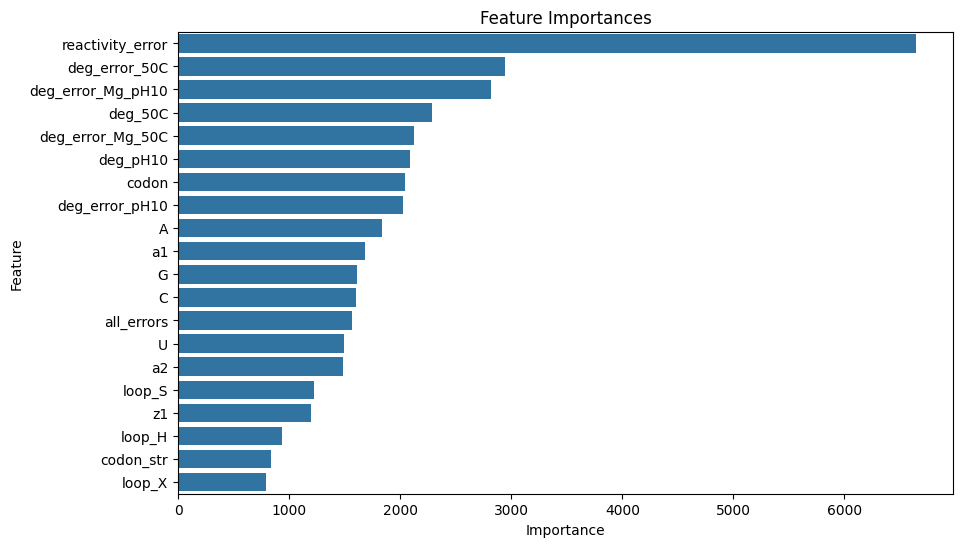

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = model_reactivity.feature_importances_
feature_importances

# Create a DataFrame with feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df[:20])
plt.title('Feature Importances')

In [46]:
X_train.corrwith(y_train).to_frame().sort_values(by=0, ascending=False)

,0
deg_50C,0.442653
deg_pH10,0.403158
structure,0.234294
codon_str,0.159206
codon_pred_loop_EEE,0.119932
...,...
codon_name_Arginine,-0.052236
sequence,-0.070992
codon_pred_loop_SSS,-0.203040
z1,-0.216969


<Axes: >

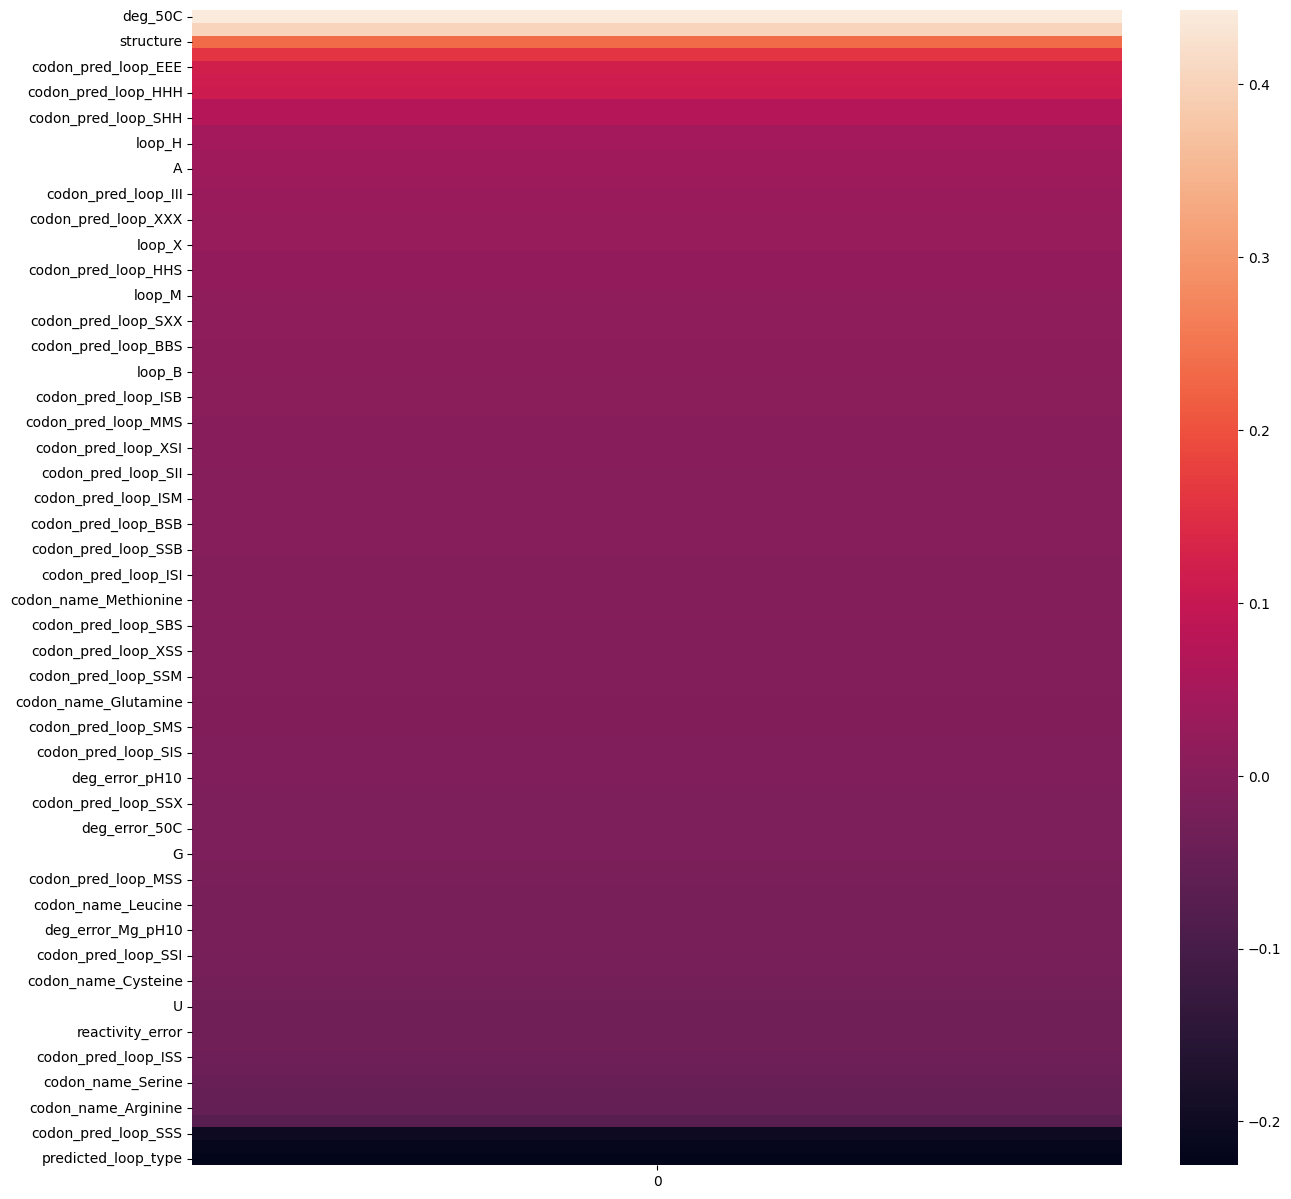

In [47]:
plt.figure(figsize=(15, 15))
sns.heatmap(X_train.corrwith(y_train).to_frame().sort_values(by=0, ascending=False))

## Model2: deg_Mg_pH10

In [48]:
#import data fror new model
train = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/COVID-19%20mRNA%20Vaccine%20Degradation/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/COVID-19%20mRNA%20Vaccine%20Degradation/test.csv')

train = pd.merge(train[['id_seqpos']], df1 , on = 'id_seqpos')
test = pd.merge(test[['id_seqpos']], df1 , on = 'id_seqpos')

### encoding

In [49]:
train.drop(['id', 'id_seqpos', 'id_number'], axis=1, inplace=True)
test.drop(['id', 'id_seqpos', 'id_number'], axis=1, inplace=True)

In [50]:
train['error_50cc'] = train['deg_error_Mg_50C'] - train['deg_error_50C']
train['error_pH10c'] = train['deg_error_Mg_pH10'] - train['deg_error_pH10']

test['error_50cc'] = test['deg_error_Mg_50C'] - test['deg_error_50C']
test['error_pH10c'] = test['deg_error_Mg_pH10'] - test['deg_error_pH10']

In [51]:
train['error'] = train['deg_error_Mg_50C']+train['deg_error_Mg_pH10']+train['deg_error_50C']+train['deg_error_pH10']
train['a1'] = train['deg_50C']+train['deg_error_50C']
train['a2'] = train['deg_pH10']+train['deg_error_pH10']

test['error'] = test['deg_error_Mg_50C']+test['deg_error_Mg_pH10']+test['deg_error_50C']+test['deg_error_pH10']
test['a1'] = test['deg_50C']+test['deg_error_50C']
test['a2'] = test['deg_pH10']+test['deg_error_pH10']

In [52]:
train['struct_unpaired'] = train['full_structure'].apply(lambda x:x.count('.'))

train['pair_rate'] = train['full_structure'].apply(lambda x:x.count('(')/68)

test['struct_unpaired'] = test['full_structure'].apply(lambda x:x.count('.'))

test['pair_rate'] = test['full_structure'].apply(lambda x:x.count('(')/68)

In [53]:
lookup_table = {
    '(': 0,
    ')': 1,
    '.': 2,
    'A': 3,
    'C': 4,
    'G': 5,
    'U': 6,
    'B': 7,
    'E': 8,
    'H': 9,
    'I': 10,
    'M': 11,
    'S': 12,
    'X': 13
}

def encoding(sequence, lookup):
    return [lookup[char] for char in sequence if char in lookup]

def preprocess_data_custom(df):
    df = df.copy()
    column_patterns = ['sequence', 'structure', 'predicted_loop']
    for pattern in column_patterns:
        columns_to_encode = [col for col in df.columns if pattern in col]
        for column in columns_to_encode:
            df[column] = df[column].apply(lambda x: ''.join(map(str, encoding(x, lookup_table))) if pd.notnull(x) else x)
    return df
train = preprocess_data_custom(train)
test = preprocess_data_custom(test)

In [54]:
train[['sequence', 'structure', 'predicted_loop_type']].head(2)

,sequence,structure,predicted_loop_type
0,3,2,9
1,5,2,10


In [55]:
train1 = train.drop(['full_structure', 'predicted_loop', 'full_sequence'], axis=1)
test1 = test.drop(['full_structure', 'predicted_loop', 'full_sequence'], axis=1)

categories_columns = train1.select_dtypes(include='object').columns

# Generate dummy variables for categorical columns
dummies = pd.get_dummies(train1[categories_columns], drop_first=True)
# Concatenate dummy variables with the main DataFrame
train1 = pd.concat([train1, dummies], axis=1)
# Optionally drop the original categorical columns
train1.drop(categories_columns, axis=1, inplace=True)

categories_columns_test = test1.select_dtypes(include='object').columns

dummies = pd.get_dummies(test1[categories_columns], drop_first=True)
test1 = pd.concat([test1, dummies], axis=1)
test1.drop(categories_columns_test, axis=1, inplace=True)

### train and test the deg_Mg_pH10 model

In [56]:
test1.drop(['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'], axis=1, inplace=True)

In [57]:
X = train1.drop(['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'], axis=1)
y=train1['deg_Mg_pH10']
X.drop([i for i in set(X.columns) - set(test1.columns)], axis=1, inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X.shape, test1.shape

((130560, 202), (32640, 202))

In [59]:
# !pip install catboost

from catboost import CatBoostRegressor, Pool
train_pool1 = Pool(X_train, y_train)
train_pool2 = Pool(X_train, y_train)
train_pool3 = Pool(X_train, y_train)

test_pool = Pool(X_test)


model1 = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=6,
                          verbose=100,
                           )
model1.fit(train_pool1)
predR = model1.predict(test_pool)

0:	learn: 0.6832354	total: 50.8ms	remaining: 50.8s
100:	learn: 0.4290301	total: 2.09s	remaining: 18.6s
200:	learn: 0.3956826	total: 4.05s	remaining: 16.1s
300:	learn: 0.3753557	total: 6.05s	remaining: 14.1s
400:	learn: 0.3611986	total: 8.31s	remaining: 12.4s
500:	learn: 0.3493274	total: 14.3s	remaining: 14.2s
600:	learn: 0.3394710	total: 18.6s	remaining: 12.4s
700:	learn: 0.3314766	total: 22s	remaining: 9.37s
800:	learn: 0.3238633	total: 26.2s	remaining: 6.51s
900:	learn: 0.3172797	total: 30.8s	remaining: 3.39s
999:	learn: 0.3113697	total: 33.2s	remaining: 0us


In [60]:
print('RMSE catboost')
print(MCRMSE(y_test,predR))


RMSE
tf.Tensor(0.4496410500219142, shape=(), dtype=float64)


In [61]:
#HGBC
from sklearn.ensemble import HistGradientBoostingRegressor
model = HistGradientBoostingRegressor(max_iter=1000, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
predR = model.predict(X_test)
print('RMSE HGBC')
print(MCRMSE(y_test,predR))

RMSE HGBC
tf.Tensor(0.4650952792910453, shape=(), dtype=float64)


In [62]:
#RF
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predR = model.predict(X_test)
print('RMSE Random Forest')
print(MCRMSE(y_test,predR))

RMSE Random Forest
tf.Tensor(0.4172951395407257, shape=(), dtype=float64)


In [63]:
#lgbm
import lightgbm as lgb
model_mg_ph10 = lgb.LGBMRegressor(n_estimators=1500, learning_rate=0.08, num_leaves=40, random_state=42)
model_mg_ph10.fit(X_train, y_train)
predR = model_mg_ph10.predict(X_test)
print('RMSE LightGBM')
print(MCRMSE(y_test,predR))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3486
[LightGBM] [Info] Number of data points in the train set: 104448, number of used features: 194
[LightGBM] [Info] Start training from score 0.447222
RMSE LightGBM
tf.Tensor(0.4079303293893931, shape=(), dtype=float64)


In [64]:
from sklearn.ensemble import GradientBoostingRegressor
base_regressor = GradientBoostingRegressor(
    n_estimators=1500,            # Number of boosting stages to be run
    learning_rate=0.1,          # Learning rate to shrink the contribution of each tree
    max_depth=4,                 # Maximum depth of the individual regression estimators
    min_samples_split=3,         # Minimum number of samples required to split an internal node
    min_samples_leaf=2,          # Minimum number of samples required to be at a leaf node
    subsample=0.8,               # Fraction of samples to be used for fitting the individual base learners
    max_features='sqrt',         # Number of features to consider when looking for the best split
    random_state=42              # Seed for random number generation
)

gpr = base_regressor
gpr.fit(X_train, y_train)
predR = gpr.predict(X_test)
print('RMSE GBM')
print(MCRMSE(y_test,predR))

RMSE GBM
tf.Tensor(0.3857073256206897, shape=(), dtype=float64)


In [65]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror',  # Use reg:squarederror for regression
                         n_estimators=100,
                         learning_rate=0.1,
                         max_depth=5,
                         random_state=42)

model.fit(X_train, y_train)
predR = model1.predict(X_test)
print('RMSE XGBOOST')
print(MCRMSE(y_test,predR))

RMSE XGBOOST
tf.Tensor(0.4496410500219142, shape=(), dtype=float64)


In [66]:
pp2 = gpr.predict(test1)

Text(0.5, 1.0, 'Feature Importances')

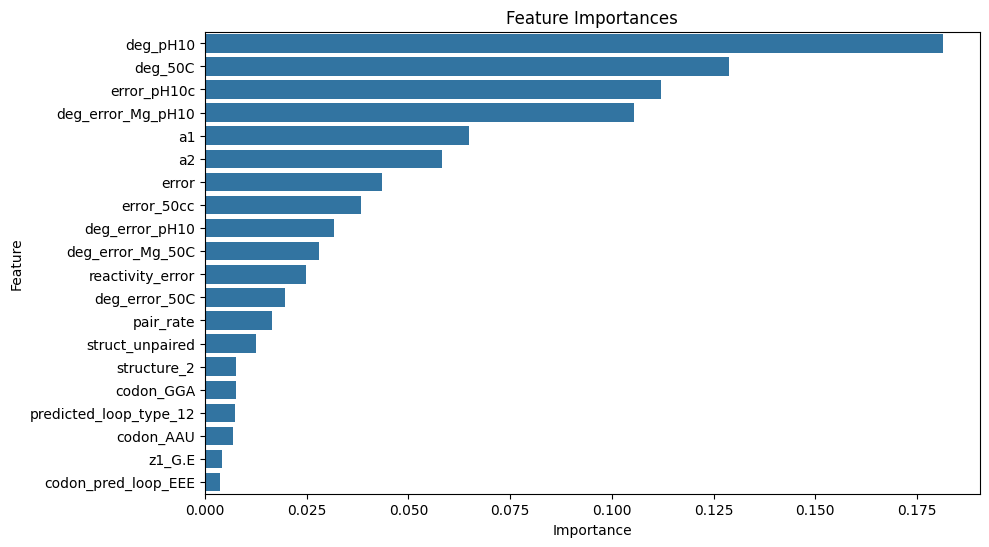

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = gpr.feature_importances_
feature_importances

# Create a DataFrame with feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df[:20])
plt.title('Feature Importances')

## Model3: deg_Mg_50C

In [68]:
train = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/COVID-19%20mRNA%20Vaccine%20Degradation/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/COVID-19%20mRNA%20Vaccine%20Degradation/test.csv')

train = pd.merge(train[['id_seqpos']], df1 , on = 'id_seqpos')
test = pd.merge(test[['id_seqpos']], df1 , on = 'id_seqpos')

In [69]:
train.drop(['id', 'id_seqpos', 'id_number'], axis=1, inplace=True)
test.drop(['id', 'id_seqpos', 'id_number'], axis=1, inplace=True)

### encoding

In [70]:
train['error_50cc'] = train['deg_error_Mg_50C'] - train['deg_error_50C']
train['error_pH10c'] = train['deg_error_Mg_pH10'] - train['deg_error_pH10']

test['error_50cc'] = test['deg_error_Mg_50C'] - test['deg_error_50C']
test['error_pH10c'] = test['deg_error_Mg_pH10'] - test['deg_error_pH10']



In [71]:
train['error'] = train['deg_error_Mg_50C']+train['deg_error_Mg_pH10']+train['deg_error_50C']+train['deg_error_pH10']
train['error&50c'] = train['deg_50C']+train['deg_error_50C']
train['error&ph10'] = train['deg_pH10']+train['deg_error_pH10']

test['error'] = test['deg_error_Mg_50C']+test['deg_error_Mg_pH10']+test['deg_error_50C']+test['deg_error_pH10']
test['error&50c'] = test['deg_50C']+test['deg_error_50C']
test['error&ph10'] = test['deg_pH10']+test['deg_error_pH10']

In [72]:
train['struct_unpaired'] = train['full_structure'].apply(lambda x:x.count('.'))

train['pair_rate'] = train['full_structure'].apply(lambda x:x.count('(')/68)

test['struct_unpaired'] = test['full_structure'].apply(lambda x:x.count('.'))

test['pair_rate'] = test['full_structure'].apply(lambda x:x.count('(')/68)

In [73]:
lookup_table = {
    '(': 0,
    ')': 1,
    '.': 2,
    'A': 3,
    'C': 4,
    'G': 5,
    'U': 6,
    'B': 7,
    'E': 8,
    'H': 9,
    'I': 10,
    'M': 11,
    'S': 12,
    'X': 13
}

def encoding(sequence, lookup):
    return [lookup[char] for char in sequence if char in lookup]

def preprocess_data_custom(df):
    df = df.copy()
    column_patterns = ['sequence', 'structure', 'predicted_loop','z1','codon_str']
    for pattern in column_patterns:
        columns_to_encode = [col for col in df.columns if pattern in col]
        for column in columns_to_encode:
            df[column] = df[column].apply(lambda x: int(''.join(map(str, encoding(x, lookup_table)))) if pd.notnull(x) else x)
    df['codon'] = df['codon'].apply(lambda x: int(''.join(map(str, encoding(x, lookup_table)))) if pd.notnull(x) else x)


    return df
train = preprocess_data_custom(train)
test = preprocess_data_custom(test)


In [74]:
# selection some features based on features importance

In [77]:
selected_cols= ['reactivity','deg_Mg_pH10','deg_Mg_50C', 'error&50c', 'error&ph10', 'error' , 'error_50cc', 'deg_50C', 'deg_error_50C', 'deg_error_Mg_50C',
                'deg_error_pH10', 'deg_error_Mg_pH10', 'struct_unpaired', 'pair_rate']
train1 = train[selected_cols]
test1 = test[selected_cols]


In [78]:
test1.drop(['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'], axis=1, inplace=True)
X = train1.drop(['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'], axis=1)
y=train1['deg_Mg_50C']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.drop([i for i in set(X.columns) - set(test1.columns)], axis=1, inplace=True)

<ipython-input-78-c8797881ea6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1.drop(['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'], axis=1, inplace=True)


In [ ]:
#RF
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predR = model.predict(X_test)
print(MCRMSE(y_test,predR))

In [79]:
#lgbm
import lightgbm as lgb
model_mg50c = lgb.LGBMRegressor(n_estimators=1500, learning_rate=0.1, num_leaves=31, random_state=42)
model_mg50c.fit(X_train, y_train)
predR = model_mg50c.predict(X_test)
print(MCRMSE(y_test,predR))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2361
[LightGBM] [Info] Number of data points in the train set: 104448, number of used features: 11
[LightGBM] [Info] Start training from score 0.405992
tf.Tensor(0.42089685137645977, shape=(), dtype=float64)


In [80]:
from sklearn.ensemble import GradientBoostingRegressor
base_regressor = GradientBoostingRegressor(
    n_estimators=1500,            # Number of boosting stages to be run
    learning_rate=0.1,          # Learning rate to shrink the contribution of each tree
    max_depth=4,                 # Maximum depth of the individual regression estimators
    min_samples_split=3,         # Minimum number of samples required to split an internal node
    min_samples_leaf=2,          # Minimum number of samples required to be at a leaf node
    subsample=0.8,               # Fraction of samples to be used for fitting the individual base learners
    max_features='sqrt',         # Number of features to consider when looking for the best split
    random_state=42              # Seed for random number generation
)
gpr2 = base_regressor
gpr2.fit(X_train, y_train)
predR = gpr2.predict(X_test)
print(MCRMSE(y_test,predR))

tf.Tensor(0.37285827382737846, shape=(), dtype=float64)


In [81]:
pp4 = gpr2.predict(test1)

Text(0.5, 1.0, 'Feature Importances')

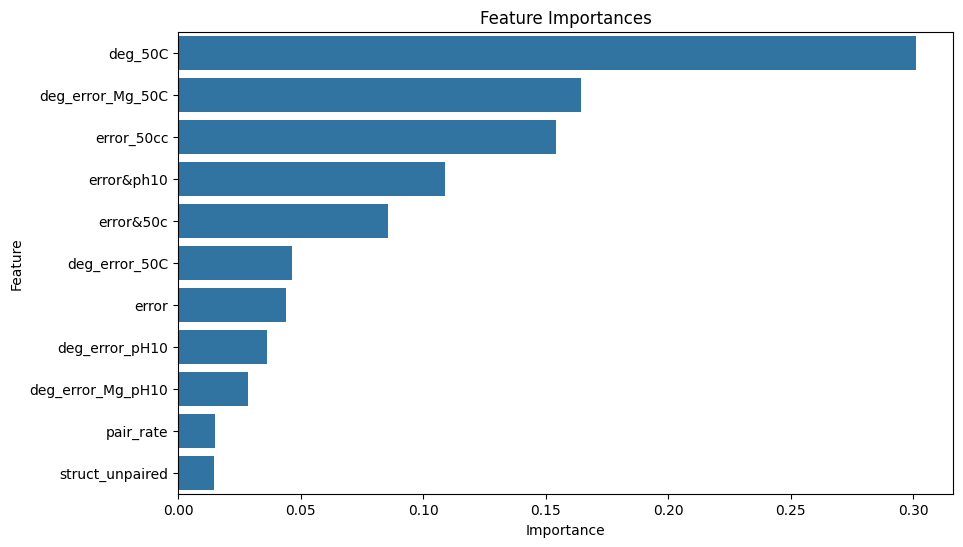

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = gpr2.feature_importances_
feature_importances

# Create a DataFrame with feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df[:20])
plt.title('Feature Importances')

# Submission

In [83]:
# please note that if you want to get the ultimate result, rettain the models using all data 100% instead of 80% by replacing X_train, y_train by X,y.

In [84]:
test = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/COVID-19%20mRNA%20Vaccine%20Degradation/test.csv')
test_ids = test['id_seqpos']

predictions_df = pd.DataFrame({'id_seqpos': test_ids, 'reactivity': pp1,'deg_Mg_pH10':pp2,'deg_Mg_50C':pp4})
predictions_df.to_csv('sub2.csv',index=False)

In [85]:
# for any inquries, contact me eng.moh.zahrawi@gmail.com